In [31]:
#%matplotlib notebook

In [32]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
# Load in csv
inflation_df= pd.read_csv('IMDB Movies-inflation-Mar22.csv')
inflation_df.head()
#inflation_df.columns

,imdb_title_id,original_title,year,date_published,genre 1,genre 2,genre 3,duration,country,language_1,...,desc35,avg_vote,votes,Budget - Inflation Adjusted,budget,USA Gross Income - Inflation Adjusted,usa_gross_income,WW Gross Income - Inflation Adjusted,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,2001.0,1/3/02,Comedy,Fantasy,Romance,118.0,USA,English,...,An English Duke from 1876 is inadvertedly,6.4,77852.0,"$70,146,403.16","$48,000,000.00","$68,863,102.48","$47,121,859.00","$111,092,974.77","$76,019,048.00",341.0
1,tt0118589,Glitter,2001.0,30/11/2001,Drama,Music,Romance,104.0,USA,English,...,A young singer dates a disc jockey,2.2,21298.0,"$32,150,434.78","$22,000,000.00","$6,246,547.43","$4,274,407.00","$7,703,925.18","$5,271,666.00",319.0
2,tt0120630,Chicken Run,2000.0,15/12/2000,Animation,Adventure,Comedy,84.0,"UK, USA, France",English,...,When a cockerel apparently flies,7.0,173987.0,"$67,633,536.59","$45,000,000.00","$160,568,875.40","$106,834,564.00","$337,919,038.00","$224,834,564.00",393.0
3,tt0120667,Fantastic Four,2005.0,16/09/2005,Action,Adventure,Fantasy,106.0,"USA, Germany",English,...,A group of astronauts gain superpowers,5.7,307944.0,"$132,519,713.26","$100,000,000.00","$205,002,801.64","$154,696,080.00","$442,000,863.36","$333,535,934.00",1029.0
4,tt0247196,Before Night Falls,2000.0,10/11/01,Biography,Drama,Romance,133.0,"USA, Mexico",English,...,"The life of Cuban poet and novelist,",7.2,23666.0,NaN,NaN,NaN,4242892,NaN,8601053,138.0


In [36]:
inflation_df.columns

Index(['imdb_title_id', 'original_title', 'year', 'date_published', 'genre 1',
       'genre 2', 'genre 3', 'duration', 'country', 'language_1', 'language_2',
       'language_3', 'director', 'writer', 'actors', 'actors_1', 'actors_f2',
       'description', 'desc35', 'avg_vote', 'votes',
       'Budget - Inflation Adjusted', ' budget ',
       ' USA Gross Income - Inflation Adjusted ', ' usa_gross_income ',
       ' WW Gross Income - Inflation Adjusted ', ' worlwide_gross_income ',
       'reviews_from_users'],
      dtype='object')

In [37]:
inflation_df[" USA Gross Income - Inflation Adjusted "] = inflation_df[" USA Gross Income - Inflation Adjusted "].replace('[\$,]', '', regex=True).astype(float)

In [38]:
actor_director_df = inflation_df[["actors_1", "director", "original_title", " USA Gross Income - Inflation Adjusted "]]
actor_director_df.head()

,actors_1,director,original_title,USA Gross Income - Inflation Adjusted
0,Meg Ryan,James Mangold,Kate & Leopold,6.886310e+07
1,Mariah Carey,Vondie Curtis-Hall,Glitter,6.246547e+06
2,Phil Daniels,"Peter Lord, Nick Park",Chicken Run,1.605689e+08
3,Ioan Gruffudd,Tim Story,Fantastic Four,2.050028e+08
4,Olatz L√≥pez Garmendia,Julian Schnabel,Before Night Falls,NaN


In [48]:
top_actors = actor_director_df.groupby(by="actors_1")
top_actors.head()
sorted_top_actors = top_actors[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
sorted_top_actors.head(50)
#print (top_actors[" USA Gross Income - Inflation Adjusted "].dtype)

actors_1
Robert Downey Jr.      4.701903e+09
Johnny Depp            3.661996e+09
Will Smith             2.972164e+09
Adam Sandler           2.839811e+09
Tom Cruise             2.654136e+09
Dwayne Johnson         2.461782e+09
Tom Hanks              2.339149e+09
Hugh Jackman           2.298166e+09
Sandra Bullock         2.169103e+09
Mark Wahlberg          2.162697e+09
Mike Myers             2.131017e+09
Christian Bale         2.077815e+09
Will Ferrell           2.041936e+09
Chris Pratt            2.025725e+09
Ben Stiller            2.012873e+09
Vin Diesel             2.010390e+09
Jim Carrey             1.953671e+09
Steve Carell           1.948581e+09
Matt Damon             1.883419e+09
Ben Affleck            1.874857e+09
Leonardo DiCaprio      1.856897e+09
Denzel Washington      1.753004e+09
Nicolas Cage           1.632175e+09
Shia LaBeouf           1.626744e+09
Harrison Ford          1.572968e+09
Tobey Maguire          1.554573e+09
Robert De Niro         1.471808e+09
Daniel Radcliffe   

In [49]:
top_actors = actor_director_df.groupby(by="actors_1")
top_actors.head()
sorted_top_actors_mean = top_actors[" USA Gross Income - Inflation Adjusted "].mean().sort_values(ascending = False)
sorted_top_actors_mean.head(50)

actors_1
Mark Hamill          6.548212e+08
Albert Brooks        5.356871e+08
Noel Appleby         5.314711e+08
Ellen DeGeneres      5.243957e+08
Carrie Fisher        5.215585e+08
Craig T. Nelson      4.927262e+08
Richard Harris       4.648480e+08
Alan Howard          4.611319e+08
Stanley Tucci        4.599321e+08
Gal Gadot            4.356068e+08
Chris Pratt          4.051450e+08
Louis C.K.           3.972464e+08
Ray Anthony          3.960602e+08
Neel Sethi           3.925198e+08
Eric Sykes           3.848610e+08
Robert Downey Jr.    3.616848e+08
Xavier Samuel        3.567016e+08
Mike Myers           3.551696e+08
Edward Asner         3.534714e+08
Paul Sanchez         3.511415e+08
Jaeden Martell       3.471954e+08
Tobey Maguire        3.109147e+08
Felicity Jones       2.996252e+08
Bruce Allpress       2.719589e+08
Ben Burtt            2.690349e+08
Auli'i Cravalho      2.682466e+08
Kelly Macdonald      2.674787e+08
Sam Neill            2.647616e+08
Harrison Ford        2.621614e+08
Sam W

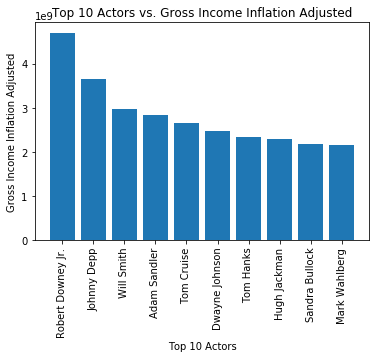

In [55]:
x_axis = sorted_top_actors.index[:10]
y_axis = sorted_top_actors.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Actors")
plt.ylabel("Gross Income Inflation Adjusted")
plt.title("Top 10 Actors vs. Gross Income Inflation Adjusted")
plt.show()

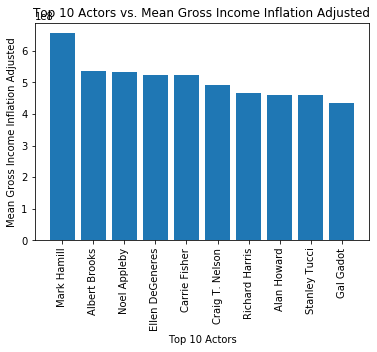

In [56]:
x_axis = sorted_top_actors_mean.index[:10]
y_axis = sorted_top_actors_mean.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Actors")
plt.ylabel("Mean Gross Income Inflation Adjusted")
plt.title("Top 10 Actors vs. Mean Gross Income Inflation Adjusted")
plt.show()

In [41]:
top_directors = actor_director_df.groupby(by="director")
top_directors.head()
sorted_top_directors = top_directors[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
sorted_top_directors.head(20)
#print (top_actors[" USA Gross Income - Inflation Adjusted "].dtype)

director
Peter Jackson               2.735140e+09
J.J. Abrams                 2.427629e+09
Anthony Russo, Joe Russo    2.390225e+09
Christopher Nolan           2.379280e+09
Michael Bay                 2.339791e+09
Steven Spielberg            2.156648e+09
Jon Favreau                 2.139051e+09
Gore Verbinski              1.909288e+09
Sam Raimi                   1.847295e+09
Ridley Scott                1.728089e+09
David Yates                 1.721851e+09
Francis Lawrence            1.684585e+09
Bryan Singer                1.614581e+09
Todd Phillips               1.610400e+09
Ron Howard                  1.593001e+09
Clint Eastwood              1.583054e+09
Zack Snyder                 1.510305e+09
Tim Burton                  1.449067e+09
Shawn Levy                  1.411908e+09
Bill Condon                 1.372930e+09
Name:  USA Gross Income - Inflation Adjusted , dtype: float64

In [54]:
top_directors = actor_director_df.groupby(by="director")
top_directors.head()
sorted_top_directors_mean = top_directors[" USA Gross Income - Inflation Adjusted "].mean().sort_values(ascending = False)
sorted_top_directors_mean.head(20)

director
James Cameron                     9.174536e+08
Andrew Adamson, Kelly Asbury      6.045220e+08
Andrew Stanton, Lee Unkrich       5.356871e+08
Andrew Stanton, Angus MacLane     5.243957e+08
Lee Unkrich                       4.925699e+08
George Lucas                      4.754424e+08
Chris Buck, Jennifer Lee          4.642378e+08
Josh Cooley                       4.393927e+08
Pete Docter, David Silverman      4.236788e+08
Joss Whedon                       4.125690e+08
J.J. Abrams                       4.046048e+08
Chris Miller, Raman Hui           4.028295e+08
Anthony Russo, Joe Russo          3.983708e+08
Chris Renaud, Yarrow Cheney       3.972464e+08
Andrew Adamson, Vicky Jenson      3.911612e+08
Pete Docter, Ronnie Del Carmen    3.897411e+08
Byron Howard, Rich Moore          3.680058e+08
Pierre Coffin, Chris Renaud       3.537181e+08
Pete Docter, Bob Peterson         3.534714e+08
Peter Jackson                     3.418925e+08
Name:  USA Gross Income - Inflation Adjusted , dtyp

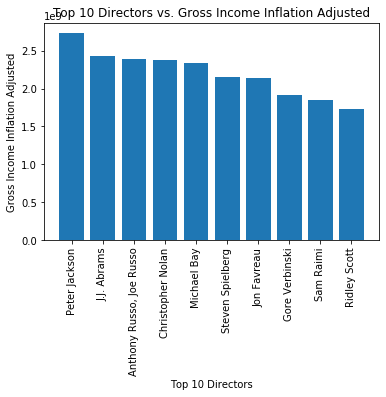

In [57]:
x_axis = sorted_top_directors.index[:10]
y_axis = sorted_top_directors.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Directors")
plt.ylabel("Gross Income Inflation Adjusted")
plt.title("Top 10 Directors vs. Gross Income Inflation Adjusted")
plt.show()

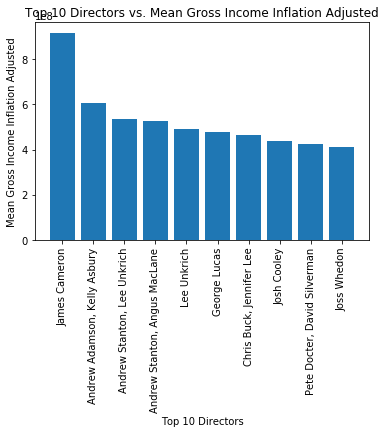

In [58]:
x_axis = sorted_top_directors_mean.index[:10]
y_axis = sorted_top_directors_mean.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Directors")
plt.ylabel("Mean Gross Income Inflation Adjusted")
plt.title("Top 10 Directors vs. Mean Gross Income Inflation Adjusted")
plt.show()

In [43]:
top_movies = inflation_df.groupby(by="original_title")
top_movies.head()
sorted_top_movies = top_movies[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
sorted_top_movies.head(50)

original_title
Star Wars: Episode VII - The Force Awakens                1.022789e+09
Avatar                                                    9.174536e+08
Avengers: Endgame                                         8.689626e+08
Black Panther                                             7.219158e+08
Jurassic World                                            7.122477e+08
The Avengers                                              7.026834e+08
Avengers: Infinity War                                    6.996416e+08
Star Wars: Episode VIII - The Last Jedi                   6.548212e+08
The Dark Knight                                           6.433931e+08
Incredibles 2                                             6.272531e+08
Shrek 2                                                   6.045220e+08
Spider-Man                                                5.855586e+08
Rogue One                                                 5.738722e+08
The Lion King                                             5.50

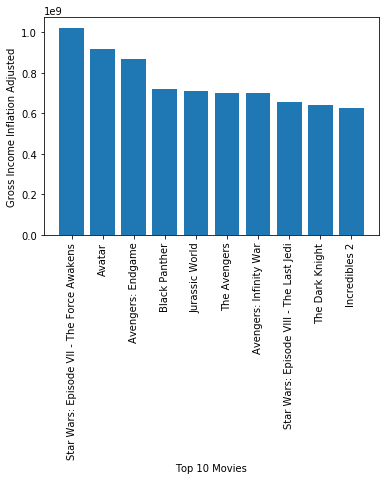

In [44]:
x_axis = sorted_top_movies.index[:10]
y_axis = sorted_top_movies.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Movies")
plt.ylabel("Gross Income Inflation Adjusted")
plt.show()

In [ ]:
x_axis = sorted_top_movies_mean.index[:10]
y_axis = sorted_top_movies_mean.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Movies")
plt.ylabel("Mean Gross Income Inflation Adjusted")
plt.show()

In [46]:
top_actors = actor_director_df.groupby(by="actors_1")
top_actors.head()
sorted_top_actors = top_actors[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
sorted_top_actors.tail(50)

actors_1
Omar Sharif              0.0
Ethan Embry              0.0
Omkar Das Manikpuri      0.0
Esther Purves-Smith      0.0
Ertan Saban              0.0
Erkan Can                0.0
Erin Kelly               0.0
Ophelia Lovibond         0.0
Orhan Aydin              0.0
Owen Campbell            0.0
Paco Le√≥n               0.0
Eric Lively              0.0
Paddy Considine          0.0
Paddy Wallace            0.0
Eol Lee                  0.0
Engin G√ºnaydin          0.0
Enes Batur               0.0
Emmanuelle Seigner       0.0
Ezra Godden              0.0
Famke Janssen            0.0
Nicholas Braun           0.0
Fares Fares              0.0
Gary Cole                0.0
Nick Purcha              0.0
Nikola Kojo              0.0
Nikolaj Coster-Waldau    0.0
Nikolaj Lie Kaas         0.0
Nils Westblom            0.0
Nina Hoss                0.0
Nirup Bhandari           0.0
Fran√ßois Civil          0.0
Fran√ßois B√©gaudeau     0.0
Nivin Pauly              0.0
Noah Centineo            0.0
Noah 